In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandatorch.data import DataFrame
from pandatorch.model import TorchModel

In [3]:
df=pd.read_csv("IRIS.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
torch_df=DataFrame(X=df.drop("species",axis=1),y=df['species'])

In [6]:
torch_df.df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
torch_df.features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

In [8]:
torch_df.target[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [9]:
torch_df.class_to_idx

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [11]:
loader=DataLoader(torch_df,batch_size=20)

In [12]:
class Net(TorchModel):
    
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(
            in_features=torch_df.get_number_of_columns(torch_df.features),
            out_features=5,
        )
        self.output = nn.Linear(5, 3)
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()

    def loss(self, outputs, targets):
        if targets is None:
            return None
        criterion = nn.CrossEntropyLoss().to(device)
        return criterion(outputs, targets)

    def forward(self, x, targets=None):
        x = self.relu(self.l1(x))
        outputs = self.softmax(self.output(x))
        loss = self.loss(outputs, targets)
        return outputs, loss


In [13]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cuda:0'
print(device)


cuda:0


In [14]:
from sklearn import metrics

In [15]:
model=Net()
optimizer=torch.optim.Adam(model.parameters())
val={"MAE":metrics.mean_absolute_error,"MSE":metrics.mean_squared_error}
losses=model.fit(torch_df,batch_size=1,epochs=30,device="cuda:0",optimizer=optimizer,metrics=val)

Epoch 1 of 30
 Loss:1.087548017501831
Epoch 2 of 30
 Loss:1.0699971914291382
Epoch 3 of 30
 Loss:1.0602257251739502
Epoch 4 of 30
 Loss:1.048940658569336
Epoch 5 of 30
 Loss:1.0365654230117798
Epoch 6 of 30
 Loss:1.021843433380127
Epoch 7 of 30
 Loss:1.0017746686935425
Epoch 8 of 30
 Loss:0.9811592698097229
Epoch 9 of 30
 Loss:0.9640849232673645
Epoch 10 of 30
 Loss:0.9477359056472778
Epoch 11 of 30
 Loss:0.9308763742446899
Epoch 12 of 30
 Loss:0.9126864671707153
Epoch 13 of 30
 Loss:0.8957987427711487
Epoch 14 of 30
 Loss:0.8800481557846069
Epoch 15 of 30
 Loss:0.8658751845359802
Epoch 16 of 30
 Loss:0.8531615138053894
Epoch 17 of 30
 Loss:0.8425337076187134
Epoch 18 of 30
 Loss:0.833830714225769
Epoch 19 of 30
 Loss:0.8255032300949097
Epoch 20 of 30
 Loss:0.8186121582984924
Epoch 21 of 30
 Loss:0.8124207258224487
Epoch 22 of 30
 Loss:0.8068628907203674
Epoch 23 of 30
 Loss:0.8040511608123779
Epoch 24 of 30
 Loss:0.7970848083496094
Epoch 25 of 30
 Loss:0.792304277420044
Epoch 26 of 30

In [16]:
print(losses)

[1.087548017501831, 1.0699971914291382, 1.0602257251739502, 1.048940658569336, 1.0365654230117798, 1.021843433380127, 1.0017746686935425, 0.9811592698097229, 0.9640849232673645, 0.9477359056472778, 0.9308763742446899, 0.9126864671707153, 0.8957987427711487, 0.8800481557846069, 0.8658751845359802, 0.8531615138053894, 0.8425337076187134, 0.833830714225769, 0.8255032300949097, 0.8186121582984924, 0.8124207258224487, 0.8068628907203674, 0.8040511608123779, 0.7970848083496094, 0.792304277420044, 0.7855570316314697, 0.7819052934646606, 0.7769904732704163, 0.7718456983566284, 0.770121693611145]


In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
zeros=np.zeros_like(losses)
print(zeros)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [20]:
mean_absolute_error(zeros,losses)

0.8925981839497884

In [21]:
print(losses)

[1.087548017501831, 1.0699971914291382, 1.0602257251739502, 1.048940658569336, 1.0365654230117798, 1.021843433380127, 1.0017746686935425, 0.9811592698097229, 0.9640849232673645, 0.9477359056472778, 0.9308763742446899, 0.9126864671707153, 0.8957987427711487, 0.8800481557846069, 0.8658751845359802, 0.8531615138053894, 0.8425337076187134, 0.833830714225769, 0.8255032300949097, 0.8186121582984924, 0.8124207258224487, 0.8068628907203674, 0.8040511608123779, 0.7970848083496094, 0.792304277420044, 0.7855570316314697, 0.7819052934646606, 0.7769904732704163, 0.7718456983566284, 0.770121693611145]


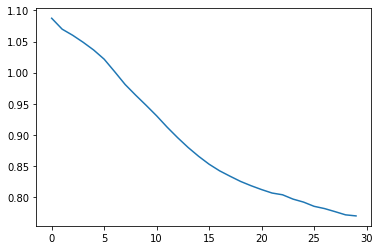

In [23]:
plt.plot(losses)